## Import

In [1]:
from ipywidgets import *
from sklearn.decomposition import PCA
from numpy import arccos, arctan
from numpy.linalg import norm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

np.set_printoptions(suppress=True)

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = False
mpl.rcParams['axes.spines.left'] = True

def cos_sim(A, B):
    return np.dot(A, B)/(np.linalg.norm(A)*np.linalg.norm(B))

def theta(v, w): 
    return np.rad2deg(arccos(v.dot(w)/(norm(v)*norm(w))))

/home/dasom/anaconda3/envs/p38/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [252]:
beta_true_novelty = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/beta_true_novelty.npy')
beta_perm_novelty = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/beta_perm_novelty.npy')
beta_true_memory = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/beta_true_memory.npy')
beta_perm_memory = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/beta_perm_memory.npy')
beta_true_recall = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/beta_true_recall_start.npy')
beta_perm_recall = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/beta_perm_recall_start.npy')

repetition = 1000 # 100

#### Alignment angle

In [ ]:
roi_num = 0

thetas = []
for repeat in range(repetition):
    pca_cooccur = PCA(n_components=12)
    data_cooccur = np.mean(beta_perm_novelty[roi_num][repeat], axis=0)[:,0].T
    pca_cooccur.fit(data_cooccur.T)

    pca_senti = PCA(n_components=12)
    data_senti = np.mean(beta_perm_novelty[roi_num][repeat], axis=0)[:,1].T
    pca_senti.fit(data_senti.T)

    pc_loading_sim_mat = np.array([cos_sim(pca_cooccur.components_[i], pca_senti.components_[i]) for i in range(12)])
    pc_loading_sim_mat[pc_loading_sim_mat > 0] = 1
    pc_loading_sim_mat[pc_loading_sim_mat < 0] = -1

    thetas.append([cos_sim(pca_cooccur.components_[pc], pc_loading_sim_mat[pc]*pca_senti.components_[pc]) for pc in range(12)])
thetas = np.array(thetas)

pca_cooccur = PCA(n_components=12)
data_cooccur = np.mean(beta_true_novelty[roi_num], axis=0)[:,0].T
pca_cooccur.fit(data_cooccur.T)

pca_senti = PCA(n_components=12)
data_senti = np.mean(beta_true_memory[roi_num], axis=0)[:,0].T
pca_senti.fit(data_senti.T)

pc_loading_sim_mat = np.array([cos_sim(pca_cooccur.components_[i], pca_senti.components_[i]) for i in range(12)])
pc_loading_sim_mat[pc_loading_sim_mat > 0] = 1
pc_loading_sim_mat[pc_loading_sim_mat < 0] = -1

cos_true = np.array([cos_sim(pca_cooccur.components_[pc], pc_loading_sim_mat[pc]*pca_senti.components_[pc]) for pc in range(12)])
plt.plot(cos_true, 'ro')
plt.plot(np.mean(thetas, axis=0), 'ko', alpha = 0.5)
errorh = np.std(thetas, axis=0)
plt.fill_between(np.arange(12), np.mean(thetas, axis=0)-errorh, np.mean(thetas, axis=0)+errorh, alpha = 0.3,color = 'grey')
plt.ylim([-0.0, 1.0])
plt.xticks(np.arange(12), np.arange(1,12+1))
plt.yticks([0,0.5,1])

print([np.sum(thetas[:,pc] > cos_true[pc])/repetition for pc in range(12)])

[0.012, 0.005, 0.135, 0.857, 0.667, 0.806, 0.397, 0.851, 0.166, 0.774, 0.287, 0.119]


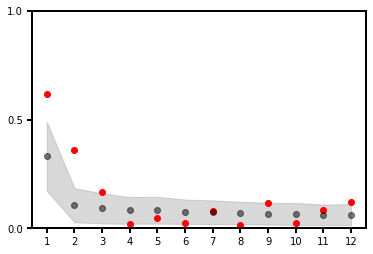

In [25]:
pca_cooccur = PCA(n_components=12)
data_cooccur = np.mean(beta_true_novelty[0], axis=0)[:,0].T
pca_cooccur.fit(data_cooccur.T)

pca_senti = PCA(n_components=12)
data_senti = np.mean(beta_true_novelty[0], axis=0)[:,1].T
pca_senti.fit(data_senti.T)

pc_loading_sim_mat = np.array([cos_sim(pca_cooccur.components_[i], pca_senti.components_[i]) for i in range(12)])
pc_loading_sim_mat[pc_loading_sim_mat > 0] = 1
pc_loading_sim_mat[pc_loading_sim_mat < 0] = -1

# theta_true = np.array([theta(pca_cooccur.components_[pc], pc_loading_sim_mat[pc]*pca_senti.components_[pc]) for pc in range(12)])
# plt.figure()
# plt.plot(theta_true, 'ko-')
# plt.plot(np.mean(thetas, axis=0), 'ko-', alpha = 0.3)
# errorh = np.std(thetas, axis=0)
# plt.fill_between(np.arange(12), np.mean(thetas, axis=0)-errorh, np.mean(thetas, axis=0)+errorh, alpha = 0.3,color = 'grey')
# plt.ylim([43, 92])
# plt.xticks(np.arange(12), np.arange(1,12+1))
# plt.yticks([45,90])

cos_true = np.array([cos_sim(pca_cooccur.components_[pc], pc_loading_sim_mat[pc]*pca_senti.components_[pc]) for pc in range(12)])
plt.plot(cos_true, 'ro')
plt.plot(np.mean(thetas, axis=0), 'ko', alpha = 0.5)
errorh = np.std(thetas, axis=0)
plt.fill_between(np.arange(12), np.mean(thetas, axis=0)-errorh, np.mean(thetas, axis=0)+errorh, alpha = 0.3,color = 'grey')
plt.ylim([-0.0, 1.0])
plt.xticks(np.arange(12), np.arange(1,12+1))
plt.yticks([0,0.5,1])

print([np.sum(thetas[:,pc] > cos_true[pc])/repetition for pc in range(12)])
plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/Principal_angle_novelty2.png',dpi=300, bbox_inches = "tight")

In [ ]:
'''
0: novelty vs. novelty
1: novelty vs. canonical
2: memory vs. canonical
3: novelty vs. memory
4: novelty vs. recall
5: memory vs. recall
'''
n_pc = 12

pca_memory_true = PCA(n_components=n_pc)
data_1 = np.mean(beta_true_memory[0], axis=0)[:,0].T
pca_memory_true.fit(data_1.T)

pca_recall_true = PCA(n_components=n_pc)
data_1 = np.mean(beta_true_recall[0], axis=0)[:,0].T
pca_recall_true.fit(data_1.T)

pca_novelty_co_true = PCA(n_components=n_pc)
data_1 = np.mean(beta_true_novelty[0], axis=0)[:,0].T
pca_novelty_co_true.fit(data_1.T)

pca_novelty_val_true = PCA(n_components=n_pc)
data_1 = np.mean(beta_true_novelty[0], axis=0)[:,1].T
pca_novelty_val_true.fit(data_1.T)

# 0
true = cos_sim(pca_novelty_co_true.components_[0], pca_novelty_val_true.components_[0])

perm = []
for r in range(len(beta_perm_novelty[0])):

    pca_novelty_co = PCA(n_components=2)
    data_1 = np.mean(beta_perm_novelty[0][r], axis=0)[:,0].T
    pca_novelty_co.fit(data_1.T)

    pca_novelty_val = PCA(n_components=2)
    data_1 = np.mean(beta_perm_novelty[0][r], axis=0)[:,1].T
    pca_novelty_val.fit(data_1.T)

    perm.append(cos_sim(pca_novelty_co.components_[0], pca_novelty_val.components_[0]))
cooccur_valence_true = true
cooccur_valence_perm = perm

# 1
true1 = cos_sim(pca_novelty_co_true.components_[0], pca_canonical.components_[0])
true2 = cos_sim(pca_novelty_co_true.components_[0], pca_canonical.components_[1])

perm1 = []
perm2 = []
for r in range(len(beta_perm_novelty[0])):

    pca_novelty_co = PCA(n_components=2)
    data_1 = np.mean(beta_perm_novelty[0][r], axis=0)[:,0].T
    pca_novelty_co.fit(data_1.T)

    perm1.append(cos_sim(pca_novelty_co.components_[0], pca_canonical.components_[0]))
    perm2.append(cos_sim(pca_novelty_co.components_[0], pca_canonical.components_[1]))
cooccur_canon1_true = true1
cooccur_canon1_perm = perm1
cooccur_canon2_true = true2
cooccur_canon2_perm = perm2

true1 = cos_sim(pca_novelty_val_true.components_[0], pca_canonical.components_[0])
true2 = cos_sim(pca_novelty_val_true.components_[0], pca_canonical.components_[1])

perm1 = []
perm2 = []
for r in range(len(beta_perm_novelty[0])):

    pca_novelty_val = PCA(n_components=2)
    data_1 = np.mean(beta_perm_novelty[0][r], axis=0)[:,1].T
    pca_novelty_val.fit(data_1.T)

    perm1.append(cos_sim(pca_novelty_val.components_[0], pca_canonical.components_[0]))
    perm2.append(cos_sim(pca_novelty_val.components_[0], pca_canonical.components_[1]))
valence_canon1_true = true1
valence_canon1_perm = perm1
valence_canon2_true = true2
valence_canon2_perm = perm2

# 2
true1 = cos_sim(pca_memory_true.components_[0], pca_canonical.components_[0])
true2 = cos_sim(pca_memory_true.components_[0], pca_canonical.components_[1])

perm1 = []
perm2 = []
for r in range(len(beta_perm_memory[0])):

    pca_memory = PCA(n_components=2)
    data_1 = np.mean(beta_perm_memory[0][r], axis=0)[:,0].T
    pca_memory.fit(data_1.T)

    perm1.append(cos_sim(pca_memory.components_[0], pca_canonical.components_[0]))
    perm2.append(cos_sim(pca_memory.components_[0], pca_canonical.components_[1]))
memory_canon1_true = true1
memory_canon1_perm = perm1
memory_canon2_true = true2
memory_canon2_perm = perm2

# 3
true1 = cos_sim(pca_novelty_co_true.components_[0], pca_memory_true.components_[0])
true2 = cos_sim(pca_novelty_co_true.components_[0], pca_memory_true.components_[1])

perm1 = []
perm2 = []
for r in range(len(beta_perm_novelty[0])):

    pca_novelty_co = PCA(n_components=2)
    data_1 = np.mean(beta_perm_novelty[0][r], axis=0)[:,0].T
    pca_novelty_co.fit(data_1.T)

    pca_memory = PCA(n_components=2)
    data_1 = np.mean(beta_perm_memory[0][r], axis=0)[:,0].T
    pca_memory.fit(data_1.T)

    perm1.append(cos_sim(pca_novelty_co.components_[0], pca_memory.components_[0]))
    perm2.append(cos_sim(pca_novelty_co.components_[0], pca_memory.components_[1]))
cooccur_memory1_true = true1
cooccur_memory1_perm = perm1
cooccur_memory2_true = true2
cooccur_memory2_perm = perm2

true1 = cos_sim(pca_novelty_val_true.components_[0], pca_memory_true.components_[0])
true2 = cos_sim(pca_novelty_val_true.components_[0], pca_memory_true.components_[1])

perm1 = []
perm2 = []
for r in range(len(beta_perm_novelty[0])):

    pca_novelty_val = PCA(n_components=2)
    data_1 = np.mean(beta_perm_novelty[0][r], axis=0)[:,1].T
    pca_novelty_val.fit(data_1.T)

    pca_memory = PCA(n_components=2)
    data_1 = np.mean(beta_perm_memory[0][r], axis=0)[:,0].T
    pca_memory.fit(data_1.T)

    perm1.append(cos_sim(pca_novelty_val.components_[0], pca_memory.components_[0]))
    perm2.append(cos_sim(pca_novelty_val.components_[0], pca_memory.components_[1]))
valence_memory1_true = true1
valence_memory1_perm = perm1
valence_memory2_true = true2
valence_memory2_perm = perm2

# 4
true1 = cos_sim(pca_novelty_co_true.components_[0], pca_recall_true.components_[0])
true2 = cos_sim(pca_novelty_co_true.components_[0], pca_recall_true.components_[1])

perm1 = []
perm2 = []
for r in range(len(beta_perm_novelty[0])):

    pca_novelty_co = PCA(n_components=2)
    data_1 = np.mean(beta_perm_novelty[0][r], axis=0)[:,0].T
    pca_novelty_co.fit(data_1.T)

    perm1.append(cos_sim(pca_novelty_co.components_[0], pca_recall_true.components_[0]))
    perm2.append(cos_sim(pca_novelty_co.components_[0], pca_recall_true.components_[1]))
cooccur_recall1_true = true1
cooccur_recall1_perm = perm1
cooccur_recall2_true = true2
cooccur_recall2_perm = perm2

true1 = cos_sim(pca_novelty_val_true.components_[0], pca_recall_true.components_[0])
true2 = cos_sim(pca_novelty_val_true.components_[0], pca_recall_true.components_[1])

perm1 = []
perm2 = []
for r in range(len(beta_perm_novelty[0])):

    pca_novelty_val = PCA(n_components=2)
    data_1 = np.mean(beta_perm_novelty[0][r], axis=0)[:,1].T
    pca_novelty_val.fit(data_1.T)
    
    perm1.append(cos_sim(pca_novelty_val.components_[0], pca_recall_true.components_[0]))
    perm2.append(cos_sim(pca_novelty_val.components_[0], pca_recall_true.components_[1]))
valence_recall1_true = true1
valence_recall1_perm = perm1
valence_recall2_true = true2
valence_recall2_perm = perm2

# 5
true1 = cos_sim(pca_memory_true.components_[0], pca_recall_true.components_[0])
true2 = cos_sim(pca_memory_true.components_[1], pca_recall_true.components_[1])

perm1 = []
perm2 = []
for r in range(len(beta_perm_memory[0])):

    pca_memory = PCA(n_components=2)
    data_1 = np.mean(beta_perm_memory[0][r], axis=0)[:,0].T
    pca_memory.fit(data_1.T)

    perm1.append(cos_sim(pca_memory.components_[0], pca_recall_true.components_[0]))
    perm2.append(cos_sim(pca_memory.components_[1], pca_recall_true.components_[1]))
memory_recall1_true = true1
memory_recall1_perm = perm1
memory_recall2_true = true2
memory_recall2_perm = perm2

In [ ]:
corr_look = np.abs([cooccur_memory2_true, valence_memory2_true, cooccur_recall2_true, valence_recall2_true])
random_look = np.abs([cooccur_memory2_perm, valence_memory2_perm, cooccur_recall2_perm, valence_recall2_perm])
# chance_level = [np.sort(random_look[c])[949] for c in range(4)]

x_pos = [0,0.4,1,1.4]
plt.figure(figsize = [6.5,4])
plt.xticks(x_pos, fontsize = 12)
plt.yticks([0,0.3,0.6], fontsize = 12)
plt.xlim([-0.4,1.8])
plt.hlines([0],-1,5, 'black', linewidth = 1, linestyle = '--')
for i in range(len(corr_look)):
    if i in [0,2]:
        plt.scatter(x_pos[i], corr_look[i], color = 'red', marker = 'D', zorder = 2)
    else:
        plt.scatter(x_pos[i], corr_look[i], color = 'magenta', marker = 'D', zorder = 2)

for c in range(4):
    plt.hlines(chance_level[c], x_pos[c]-0.15, x_pos[c]+0.15, color = 'grey', linestyle = '--')

for c in range(4):
    plt.scatter(np.random.normal(size=1000)/30 + x_pos[c], random_look[c], color = 'grey', alpha = 0.2)


# violin_parts = plt.violinplot(random_look.T, x_pos, showmeans=False, showmedians=False, showextrema=False, widths = 0.25)
# count = 0
# for vp in violin_parts['bodies']:
#     if count in [0,1]:
#         vp.set_facecolor('#2D639E')
#     else:
#         vp.set_facecolor('#8190B5')
#     vp.set_alpha(0.5)
#     count += 1

plt.ylim([0, 0.6])
plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/Alignment_angle_novelty_movie_recall.png',dpi=300, bbox_inches = "tight")